# EDA on 'Indian Premiere League'  Dataset

 ## Exploratory Data Analysis - Sports
- Performing an exploratory data analysis (EDA) on the Indian Premier League (IPL) dataset, which consists of two main files: 'matches.csv' and "deliveries.csv". The analysis aimed to uncover key insights and trends related to team performances, player contributions, and match outcomes in the IPL.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

In [4]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Desribing data.

In [14]:
matches_df.shape

(756, 18)

In [6]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [16]:
deliveries_df.shape

(179078, 21)

In [7]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

### Variables in the given data.

In [9]:
matches_df.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

### Checking for missing values

In [11]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Merging two datasets for better analysis

In [18]:
ipl = pd.merge(deliveries_df,matches_df, left_on='match_id', right_on ='id')
ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [20]:
ipl.shape

(179078, 39)

In [22]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [23]:
ipl.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Matches Dataset

In [25]:
matches_df['id'].is_unique

True

- Since, id is unique we can set this as our index 

In [27]:
matches_df.set_index('id', inplace=True)

In [29]:
#Summary statistics of matches data
matches_df.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


### From Pre profiling, we found that:

- city has missing values

- umpire1 and umpire2 have 2 missing value each

- umpire3 has 84% missing values

- city has 32 distinct values while venue has 41 distinct values

### Filling the missing values

In [33]:
matches_df[matches_df.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


- We can fill the missing values in city by Dubai

In [34]:
matches_df.city = matches_df.city.fillna('Dubai')

In [35]:
matches_df[(matches_df.umpire1.isnull()) | (matches_df.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


- Umpire3 column has close to 84% missing values. hence dropping that column

In [37]:
matches_df = matches_df.drop('umpire3', axis = 1)

In [39]:
#city has 32 distinct values while we have 41 venues.
#Let's find out which cities have multiple venues

city_venue = matches_df.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

### Observations
- Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them
- Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium there
- Mumbai has 3 stadiums/venues used for IPL
- Pune has 2 venues for IPL<br>
### Visual representation of number of venues in each city 

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

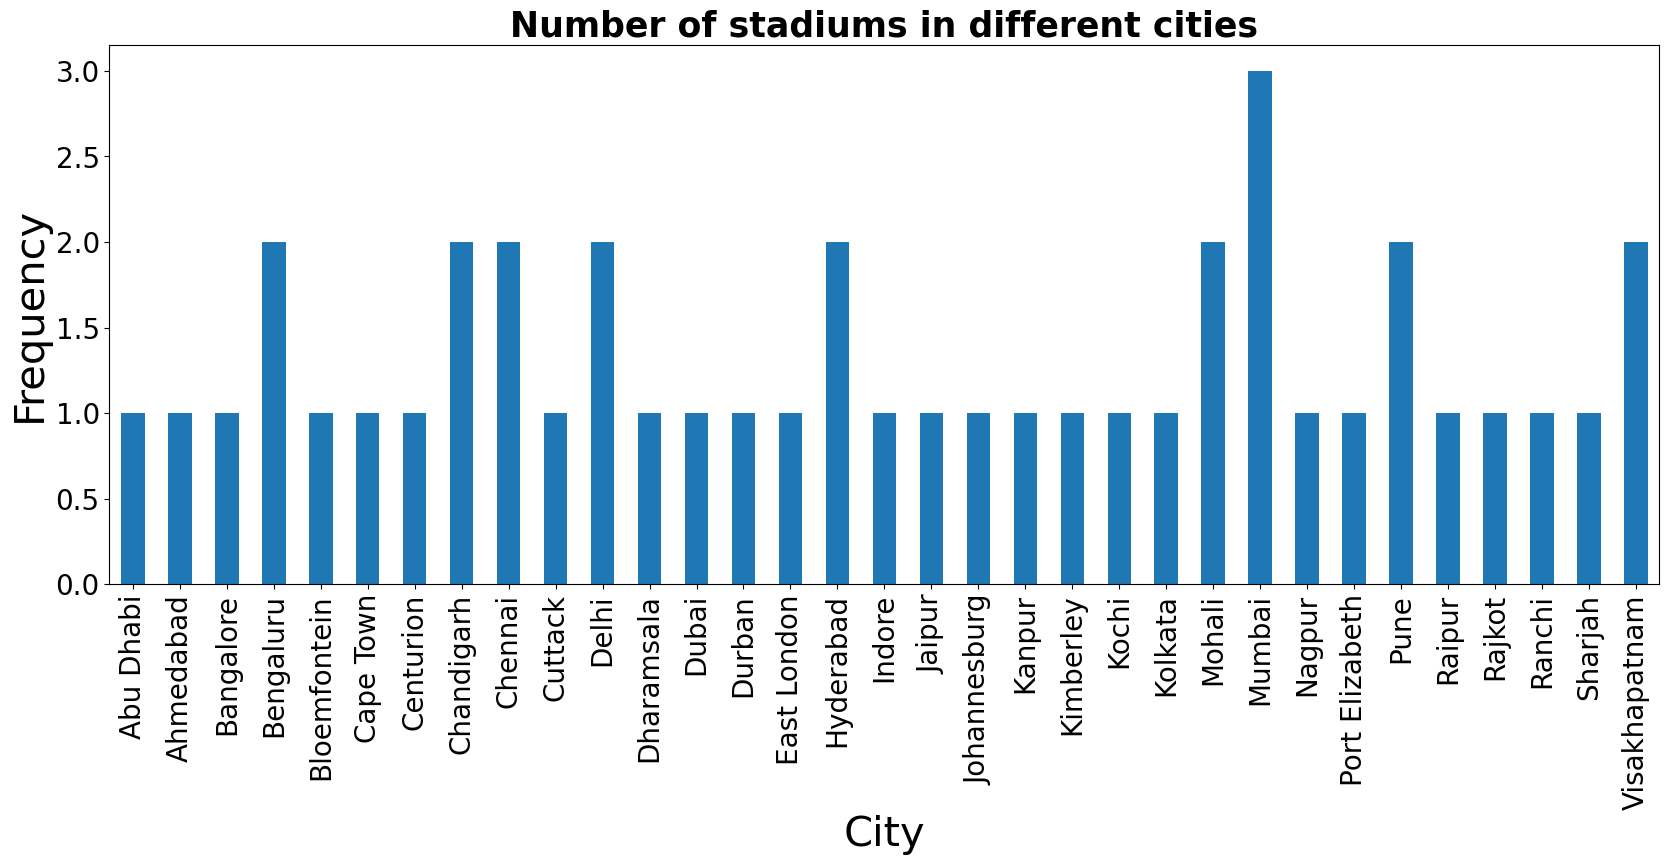

In [43]:
#Plotting venues along with cities 
v = pd.crosstab(matches_df['city'],matches_df['venue'])
v[v != 0] = 1
#Adding a column by summing each columns
v['count'] = v.sum(axis = 'columns')
#We will just keep last column = 'count'
b = v['count']

#Plotting
plt.figure(figsize = (20,7))
b.plot(kind = 'bar')
plt.title("Number of stadiums in different cities", fontsize = 25, fontweight = 'bold')
plt.xlabel("City", size = 30)
plt.ylabel("Frequency", size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)


### Analyzing the most successful teams by the number of matches won

In [44]:
# Count the number of wins for each team
team_wins = matches_df['winner'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']
team_wins

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


* By no of matches won,  **Mumbai Indians** is the most successful team followed by **Chennai Super Kings**.

### Team won by Maximum runs  and wickets.

In [54]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Kolkata Knight Riders'

In [55]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kings XI Punjab'

### Analyzing the most impactful players by the number of "Player of the Match" awards.

In [56]:
# Count the number of "Player of the Match" awards for each player
player_of_match_awards = matches_df['player_of_match'].value_counts().reset_index()
player_of_match_awards.columns = ['player', 'awards']
player_of_match_awards.head(10)
# Top 10 players based on POM awards

,player,awards
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


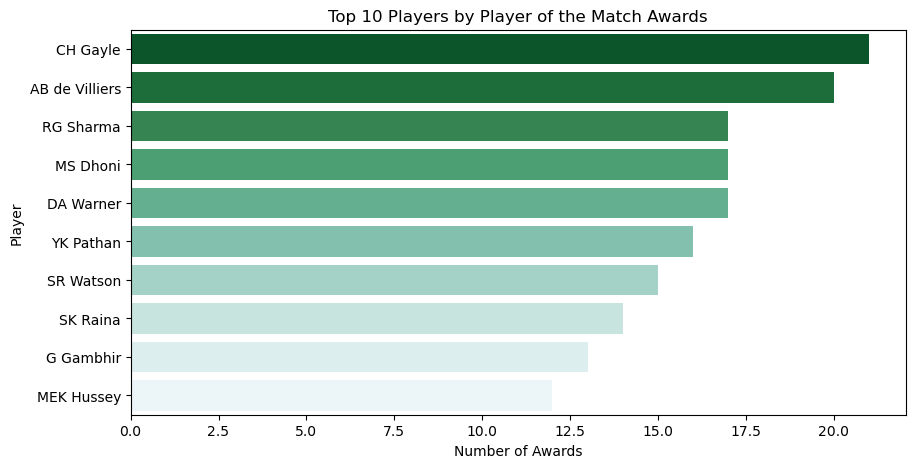

In [129]:
# Calculating the top players based on "Player of the Match" awards
top_players = matches_df['player_of_match'].value_counts().head(10).reset_index()
top_players.columns = ['player', 'awards']

# Plotting the top players based on "Player of the Match" awards

plt.figure(figsize=(10, 5))
sns.barplot(x='awards', y='player', data=top_players,hue='player', palette='BuGn_r',legend=None)
plt.title('Top 10 Players by Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()


* Most player of matches awards were achieved by **CH Gayle** followed by **AB de Villiers** .

### Analyzing the impact of toss decision on match result.

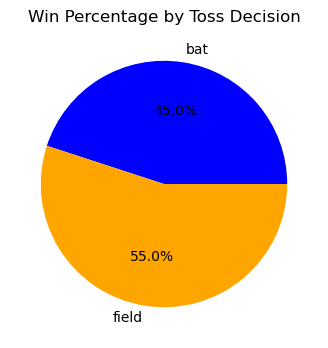

In [57]:
# Creating a new column to indicate if the toss winner won the match
matches_df['toss_win_match_win'] = matches_df['toss_winner'] == matches_df['winner']

# Count the number of matches won by toss decision
toss_decision_win = matches_df.groupby('toss_decision')['toss_win_match_win'].mean().reset_index()
toss_decision_win.columns = ['toss_decision', 'win_percentage']

toss_decision_win

# Plotting a pie chart to visualize the win percentages for each toss decision
plt.figure(figsize=(4,4))
plt.pie(toss_decision_win['win_percentage'], labels=toss_decision_win['toss_decision'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Win Percentage by Toss Decision')
plt.show()

- Teams winning tosses and electing to field first have won most number of times.

### Individual teams decision to choose bat or field after winning toss.

Text(0, 0.5, 'Count')

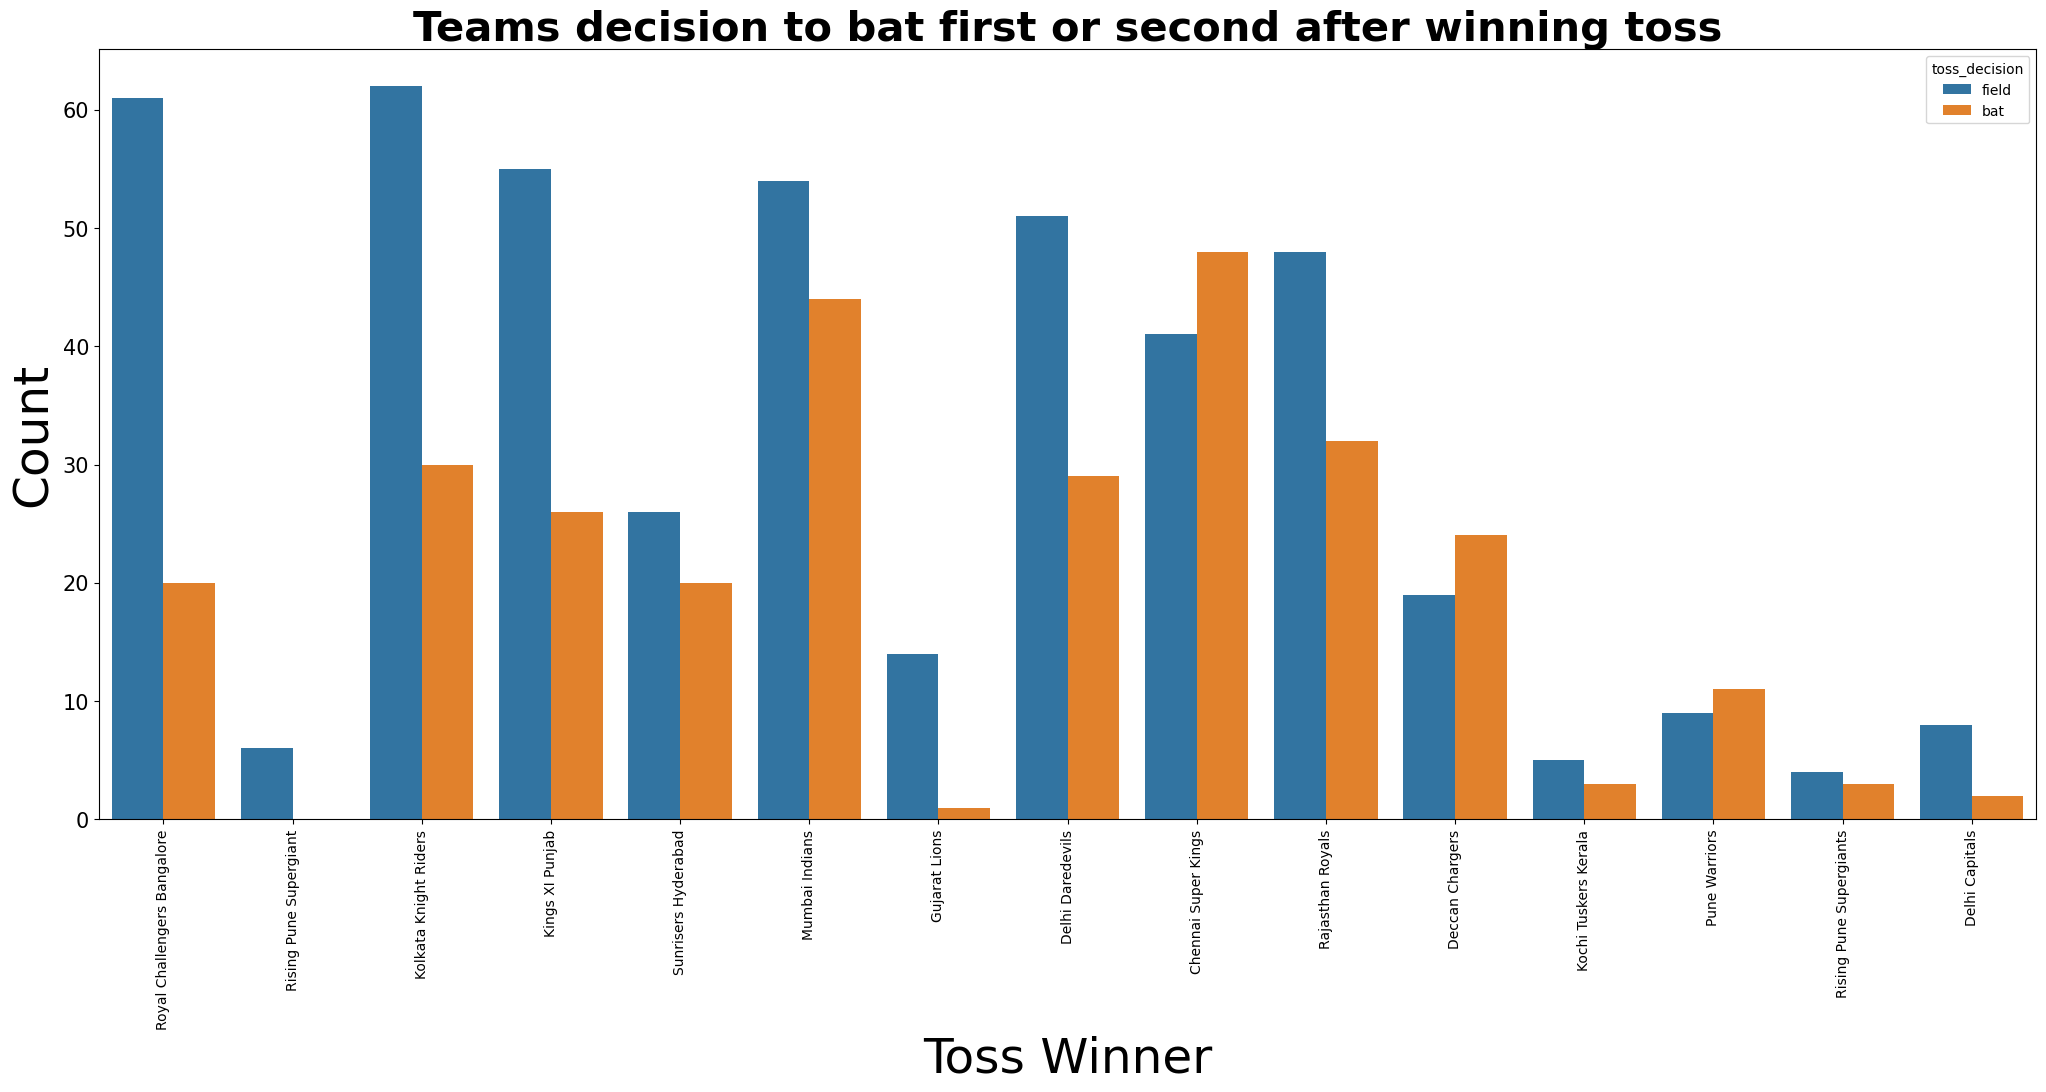

In [108]:
plt.figure(figsize = (25,10))
sns.countplot(x='toss_winner', data = matches_df, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10,rotation=90)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

- Most teams field first after winning toss except for Chennai Super Kings who has mostly opted to bat first. Deccan Chargers and Pune Warriors also show the same trend.

### Plotting the margin of victory by runs and by wickets.

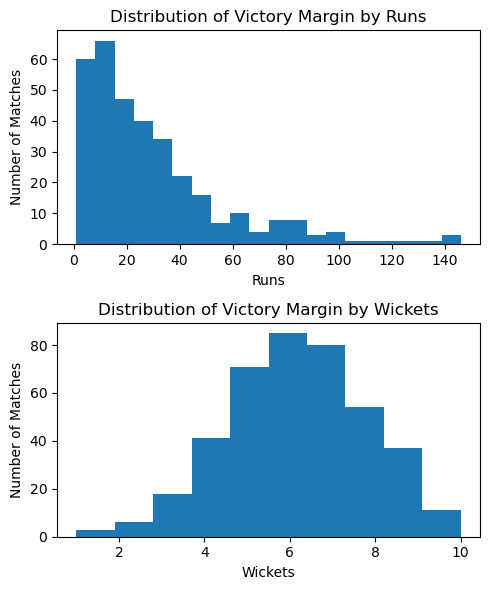

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(5,6))

# Histogram for win by runs
matches_df[matches_df['win_by_runs'] > 0]['win_by_runs'].plot(kind='hist', bins=20, ax=ax[0])
ax[0].set_title('Distribution of Victory Margin by Runs')
ax[0].set_xlabel('Runs')
ax[0].set_ylabel('Number of Matches')

# Histogram for win by wickets
matches_df[matches_df['win_by_wickets'] > 0]['win_by_wickets'].plot(kind='hist', bins=10, ax=ax[1])
ax[1].set_title('Distribution of Victory Margin by Wickets')
ax[1].set_xlabel('Wickets')
ax[1].set_ylabel('Number of Matches')

plt.tight_layout()
plt.show()

* The histograms show the distribution of victory margins in IPL matches, with most matches won by runs having a margin less than 40, and matches won by wickets having a margin typically between 5 to 8 wickets.

### Number of matches every season.

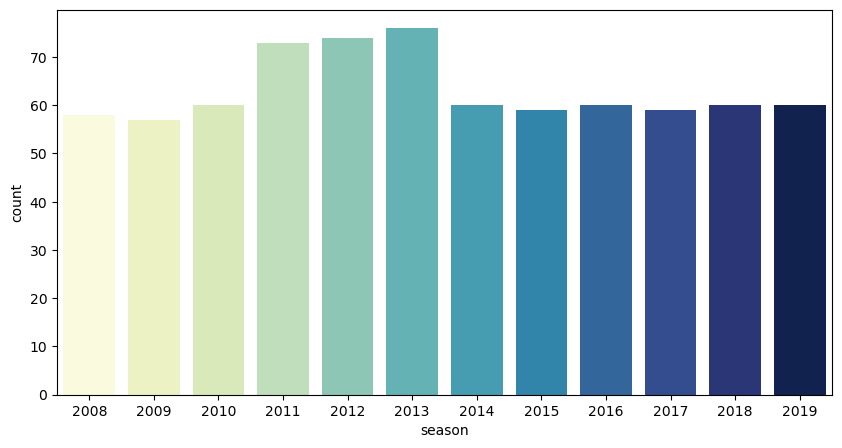

In [127]:
plt.figure(figsize=(10,5))

sns.countplot(x='season', data=matches_df,hue='season',palette='YlGnBu',legend=None)
plt.show()

* Most matches were played in the season **2013**.

### Now let us see most common dismissal types in IPL.

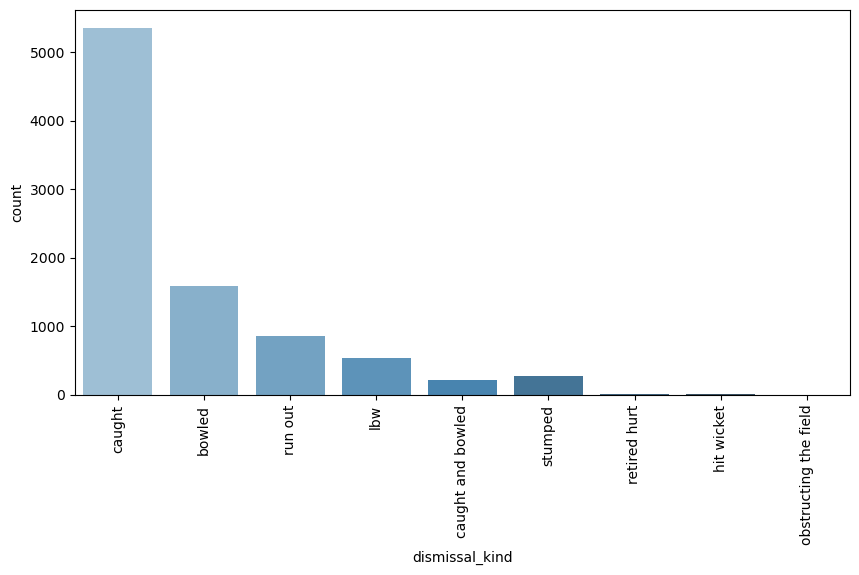

In [128]:
plt.figure(figsize=(10,5))

sns.countplot(x='dismissal_kind', data=deliveries_df,hue='dismissal_kind',palette='Blues_d',legend=None)
plt.xticks(rotation='vertical')
plt.show()

* Getting **Caught** is the most common dismissal_kind.

### Number of matches played at each venue for the top Venues.

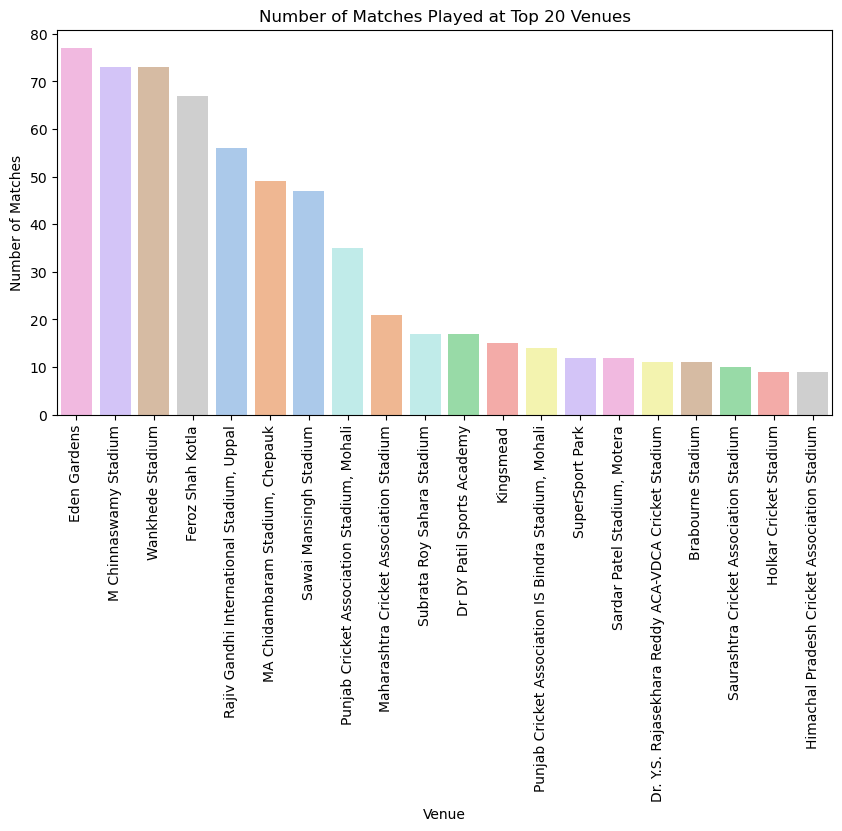

In [126]:
top_venues = matches_df['venue'].value_counts().head(20).index
top_venues_df = matches_df[matches_df['venue'].isin(top_venues)]

# Plotting the number of matches played at the top 20 venues

plt.figure(figsize=(10, 5))
sns.countplot(x='venue', data=top_venues_df, order=top_venues,hue='venue',palette='pastel',legend=None)
plt.title('Number of Matches Played at Top 20 Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation="vertical")
plt.show()

* Most matches were played at **Eden gardens** followed by **M Chinnaswamy stadium** and ***Wankhede stadium***.

### Teams that played most number of matches.

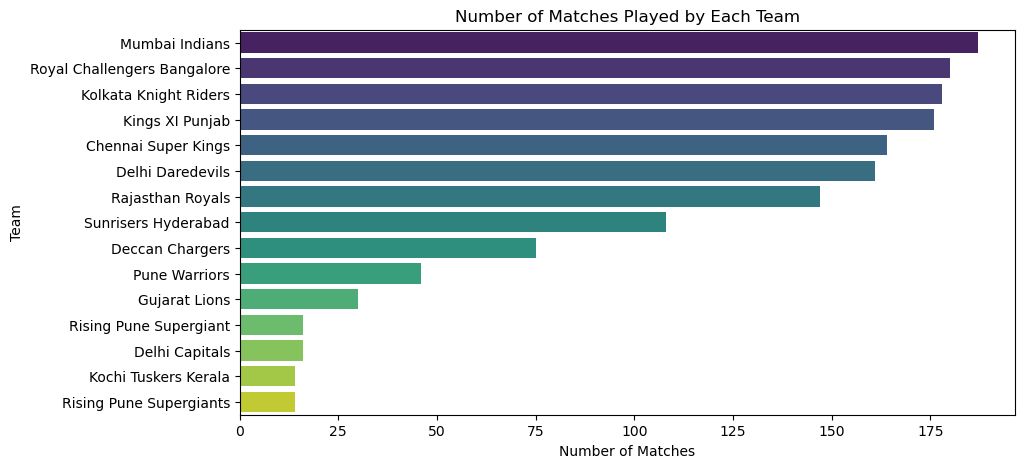

In [124]:
temp_df = pd.melt(matches_df, id_vars=['season'], value_vars=['team1', 'team2'])
team_counts = temp_df['value'].value_counts().reset_index()
team_counts.columns = ['team', 'count']


# Plotting the teams in descending order of match counts
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='team', data=team_counts,hue='team', palette='viridis',legend=None)
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Number of Matches')
plt.ylabel('Team')
plt.show()

* Most number of matches were played by **Mumbai Indians**.

### Number of wins for each team.

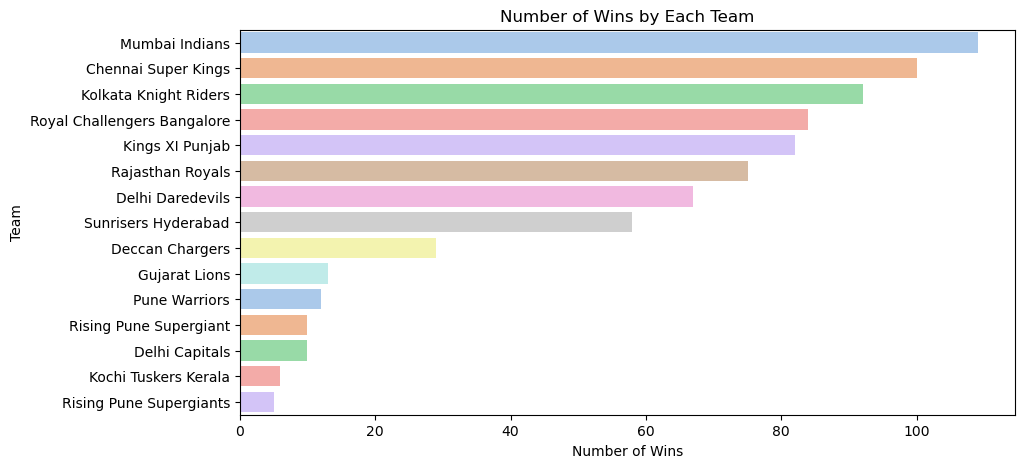

In [123]:
team_wins = matches_df['winner'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']

# Plotting the teams in descending order of wins
plt.figure(figsize=(10, 5))
sns.barplot(x='wins', y='team', data=team_wins,hue='team', palette='pastel',legend=False)
plt.title('Number of Wins by Each Team')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

* ***Mumbai Indians*** won the most number of matches followed by **Chennai super kings**.

### Year wise champions.

In [74]:
champions_df = matches_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
champions_df.columns = ['season', 'champion']

champions_df


,season,champion
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


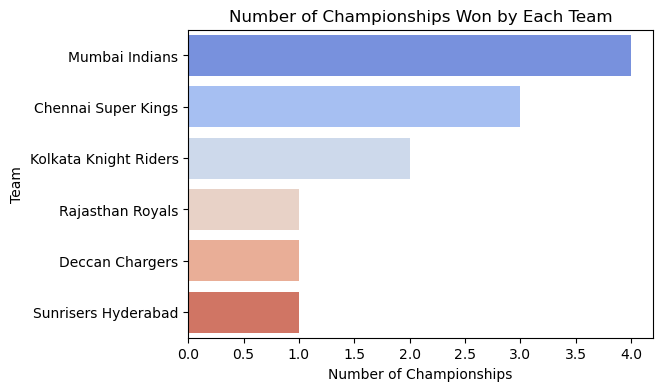

In [122]:
champion_counts = champions_df['champion'].value_counts().reset_index()
champion_counts.columns = ['team', 'championships']

# Plotting the number of championships won by each team
plt.figure(figsize=(6, 4))
sns.barplot(x='championships', y='team', data=champion_counts,hue='team', palette='coolwarm',legend=False)
plt.title('Number of Championships Won by Each Team')
plt.xlabel('Number of Championships')
plt.ylabel('Team')
plt.show()

* **Mumbai Indians** won most number of Titles.

### Number of matches each umpire has umpired.

In [76]:
# First, we need to consider both umpire1 and umpire2 columns
umpire1_matches = matches_df['umpire1'].value_counts().reset_index()
umpire2_matches = matches_df['umpire2'].value_counts().reset_index()

# Rename the columns for clarity
umpire1_matches.columns = ['umpire', 'matches']
umpire2_matches.columns = ['umpire', 'matches']

# Combine the counts from both columns
total_umpire_matches = pd.concat([umpire1_matches, umpire2_matches], ignore_index=True)

# Group by umpire and sum the matches
total_umpire_matches = total_umpire_matches.groupby('umpire')['matches'].sum().reset_index()
total_umpire_matches = total_umpire_matches.sort_values(by='matches', ascending=False)

total_umpire_matches.head(10)
# Getting the list of top 10 umpires

,umpire,matches
57,S Ravi,106
25,HDPK Dharmasena,87
18,C Shamshuddin,73
4,AK Chaudhary,58
61,SJA Taufel,55
38,M Erasmus,54
12,Asad Rauf,51
45,Nitin Menon,42
16,BR Doctrove,42
20,CK Nandan,41


* **S Ravi** appears to be the most sought-after umpire for IPL matches, followed by **HDPK Dharmasena**.

# Deliveries Data set

## Batsman analysis

### Top batsmen based on total runs scored.

In [456]:
# Calculate total runs scored by each batsman
top_batsmen = deliveries_df.groupby('batsman')['batsman_runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
top_batsmen.head(10)

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


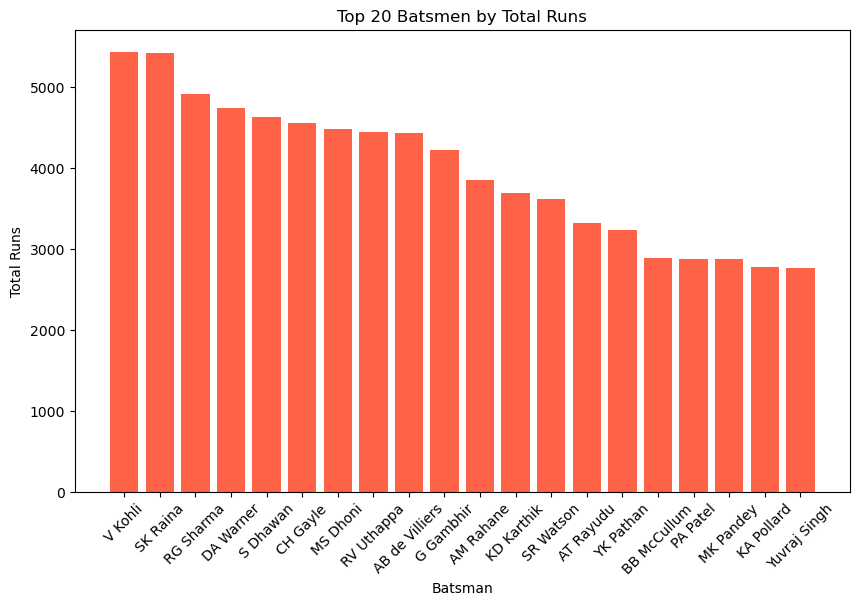

In [77]:
# Plotting the top 20 batsmen
top_batsmen = deliveries_df.groupby('batsman')['batsman_runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values(by='batsman_runs', ascending=False).head(20).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(top_batsmen['batsman'], top_batsmen['batsman_runs'], color='tomato')
plt.title('Top 20 Batsmen by Total Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

* **Virat Kohli** is the highest run getter in the tournament followed by **Suresh Raina** and ***Rohit Sharma***.

### Runs scored by Virat Kohli with seasons.

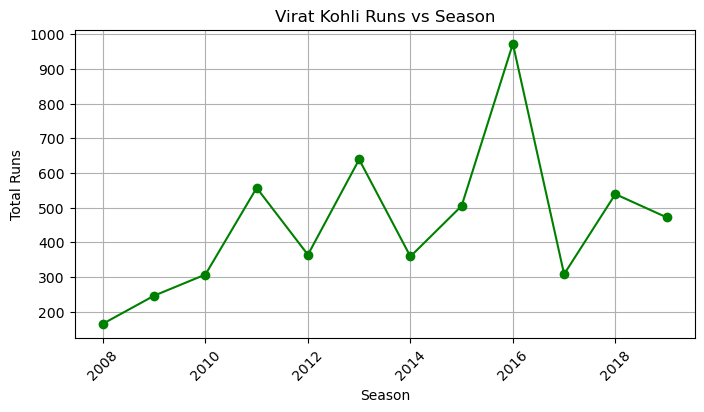

In [80]:
# Filter the deliveries dataset for Virat Kohli
virat_kohli_deliveries = deliveries_df[deliveries_df['batsman'] == 'V Kohli']

# Merge with matches dataset to get the season information
virat_kohli_deliveries = virat_kohli_deliveries.merge(matches_df[['season']], left_on='match_id', right_on='id')

# Calculate the total runs scored by Virat Kohli in each season
virat_kohli_runs_per_season = virat_kohli_deliveries.groupby('season')['batsman_runs'].sum().reset_index()

# Plotting the total runs scored by Virat Kohli in each season
plt.figure(figsize=(8, 4))
plt.plot(virat_kohli_runs_per_season['season'], virat_kohli_runs_per_season['batsman_runs'], marker='o', linestyle='-', color='g')
plt.title('Virat Kohli Runs vs Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

 * **2016** Was the Peak year of **Virat Kohli** scoring **973** runs.

### Top batsmen based on the Strike Rate. 

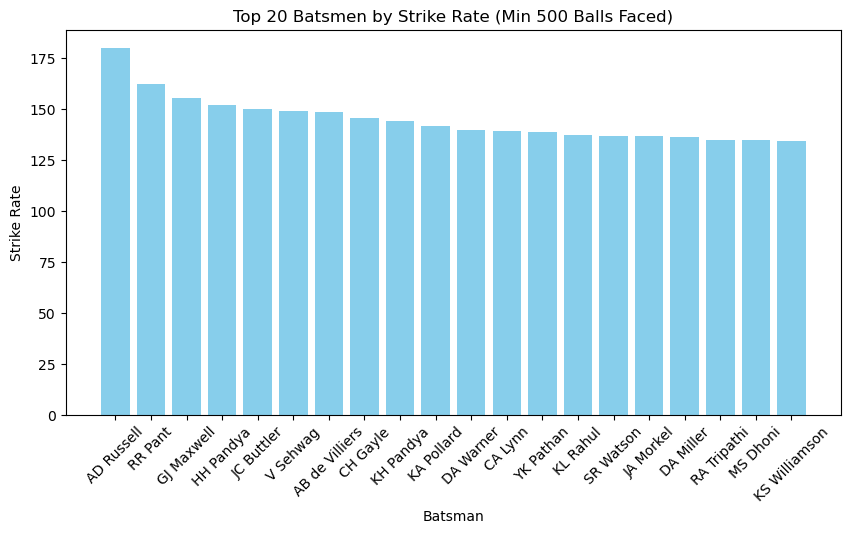

In [81]:
# Calculate the total runs scored by each batsman
total_runs = deliveries_df.groupby('batsman')['batsman_runs'].sum().reset_index()
total_runs.columns = ['batsman', 'total_runs']

# Calculate the total balls faced by each batsman
total_balls = deliveries_df['batsman'].value_counts().reset_index()
total_balls.columns = ['batsman', 'total_balls']

# Merge the two dataframes
batsman_stats = pd.merge(total_runs, total_balls, on='batsman')

# Calculate the strike rate (runs per 100 balls)
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['total_balls']) * 100

# Filter out batsmen who have faced less than 500 balls
batsman_stats = batsman_stats[batsman_stats['total_balls'] >= 500]

# Sort by strike rate in descending order and select the top 20 batsmen
top_20_batsmen_strike_rate = batsman_stats.sort_values(by='strike_rate', ascending=False).head(20)

# Plotting the strike rates of the top 20 batsmen
plt.figure(figsize=(10, 5))
plt.bar(top_20_batsmen_strike_rate['batsman'], top_20_batsmen_strike_rate['strike_rate'], color='skyblue')
plt.title('Top 20 Batsmen by Strike Rate (Min 500 Balls Faced)')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.show()

* **Andre Russel** has the best Strike Rate followed by ***Rishabh Pant*** and **Glenn Maxwell**.

### Top batsmen based on the number of boundaries (4s).

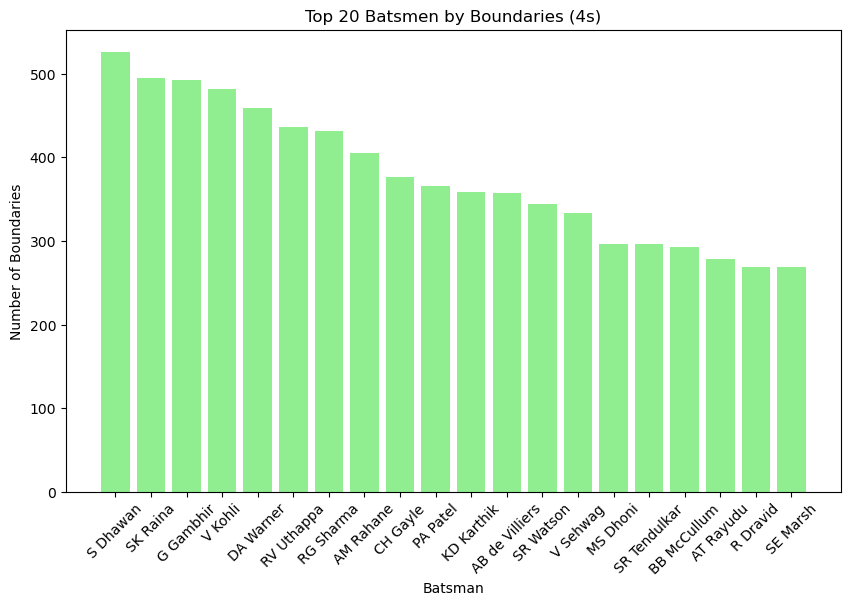

In [82]:
# Most number of boundaries (4s)
boundaries = deliveries_df[deliveries_df['batsman_runs'] == 4]
top_boundaries = boundaries['batsman'].value_counts().head(20).reset_index()
top_boundaries.columns = ['batsman', 'boundaries']

# Plotting the top batsmen based on boundaries
plt.figure(figsize=(10, 6))
plt.bar(top_boundaries['batsman'], top_boundaries['boundaries'], color='lightgreen')
plt.title('Top 20 Batsmen by Boundaries (4s)')
plt.xlabel('Batsman')
plt.ylabel('Number of Boundaries')
plt.xticks(rotation=45)
plt.show()

* ***Shikhar Dhawan*** scored most number of Boundaries (4's) followed by **Suresh Raina** and **Gautam Gambhir**.

### Top batsmen based on the number of sixers (6s).

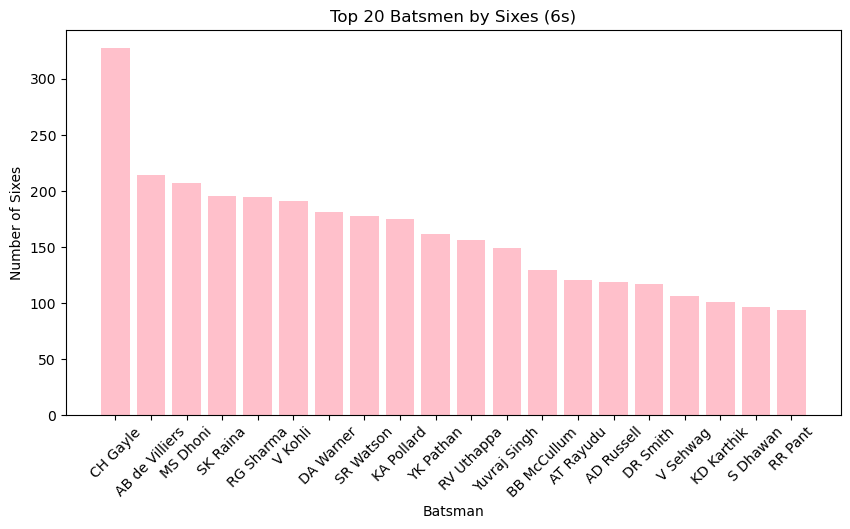

In [84]:
# Most number of sixes (6s)
sixes = deliveries_df[deliveries_df['batsman_runs'] == 6]
top_sixes = sixes['batsman'].value_counts().head(20).reset_index()
top_sixes.columns = ['batsman', 'sixes']
top_boundaries,top_sixes

# Plotting the top batsmen based on sixes
plt.figure(figsize=(10,5))
plt.bar(top_sixes['batsman'], top_sixes['sixes'], color='pink')
plt.title('Top 20 Batsmen by Sixes (6s)')
plt.xlabel('Batsman')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=45)
plt.show()

* **Christopher Henry Gayle** scored most number of sixes followed by **AB de villiers**.

### Calculate the top batsmen based on the number of dot balls faced.

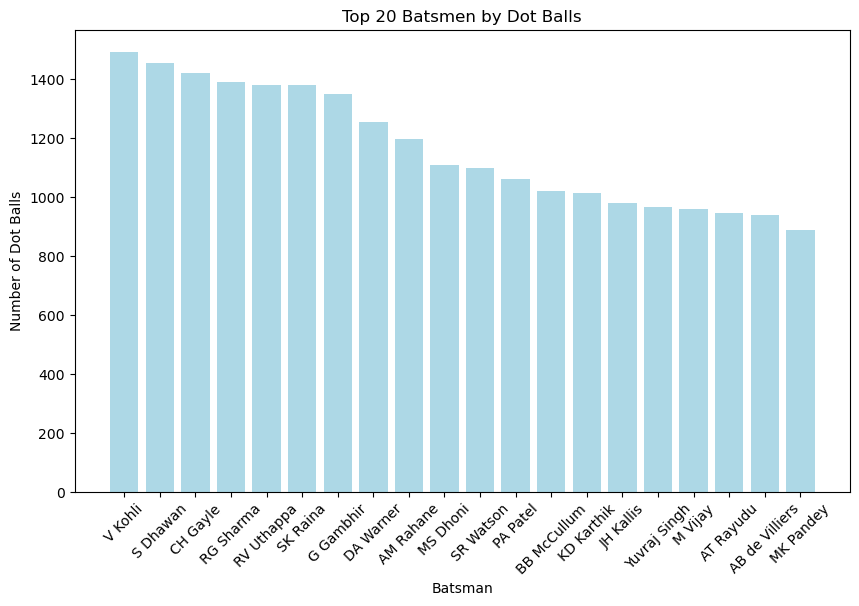

In [91]:
# Most number of dot balls
dot_balls = deliveries_df[deliveries_df['batsman_runs'] == 0]
top_dot_balls = dot_balls['batsman'].value_counts().head(20).reset_index()
top_dot_balls.columns = ['batsman', 'dot_balls']

# Plotting the top batsmen based on dot balls
plt.figure(figsize=(10, 6))
plt.bar(top_dot_balls['batsman'], top_dot_balls['dot_balls'], color='lightblue')
plt.title('Top 20 Batsmen by Dot Balls')
plt.xlabel('Batsman')
plt.ylabel('Number of Dot Balls')
plt.xticks(rotation=45)
plt.show()

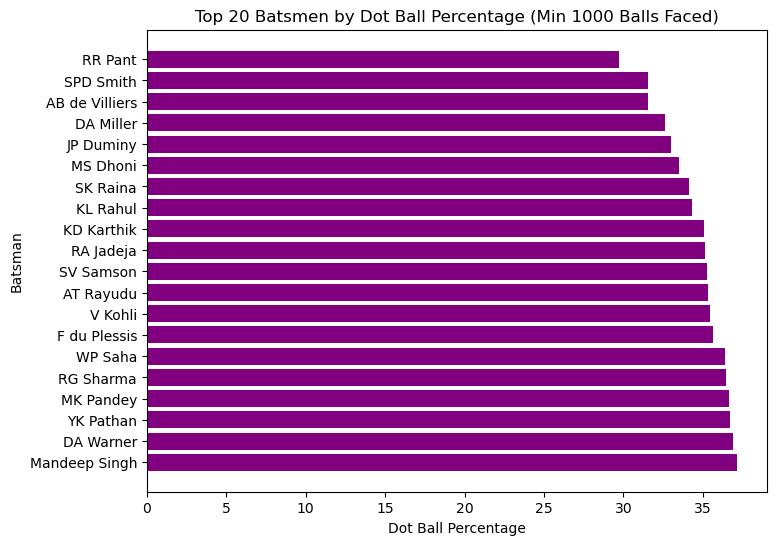

In [92]:
# Calculate the total balls faced by each batsman
total_balls_faced = deliveries_df['batsman'].value_counts().reset_index()
total_balls_faced.columns = ['batsman', 'total_balls']

total_balls_faced = total_balls_faced[total_balls_faced['total_balls'] >= 1000]

dot_balls_faced = deliveries_df[deliveries_df['batsman_runs'] == 0]['batsman'].value_counts().reset_index()
dot_balls_faced.columns = ['batsman', 'dot_balls']

# Merge the two dataframes
batsman_dot_ball_percentage = pd.merge(total_balls_faced, dot_balls_faced, on='batsman', how='left')
batsman_dot_ball_percentage['dot_ball_percentage'] = (batsman_dot_ball_percentage['dot_balls'] / batsman_dot_ball_percentage['total_balls']) * 100

batsman_dot_ball_percentage = batsman_dot_ball_percentage.sort_values(by='dot_ball_percentage').reset_index(drop=True)
top_20_batsmen = batsman_dot_ball_percentage.head(20)

# Plotting the top 20 batsmen based on dot ball percentage
plt.figure(figsize=(8, 6))
plt.barh(top_20_batsmen['batsman'], top_20_batsmen['dot_ball_percentage'], color='purple')
plt.title('Top 20 Batsmen by Dot Ball Percentage (Min 1000 Balls Faced)')
plt.xlabel('Dot Ball Percentage')
plt.ylabel('Batsman')
plt.gca().invert_yaxis()
plt.show()

### Which batsman has been most consistent among top 10 run getters?

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

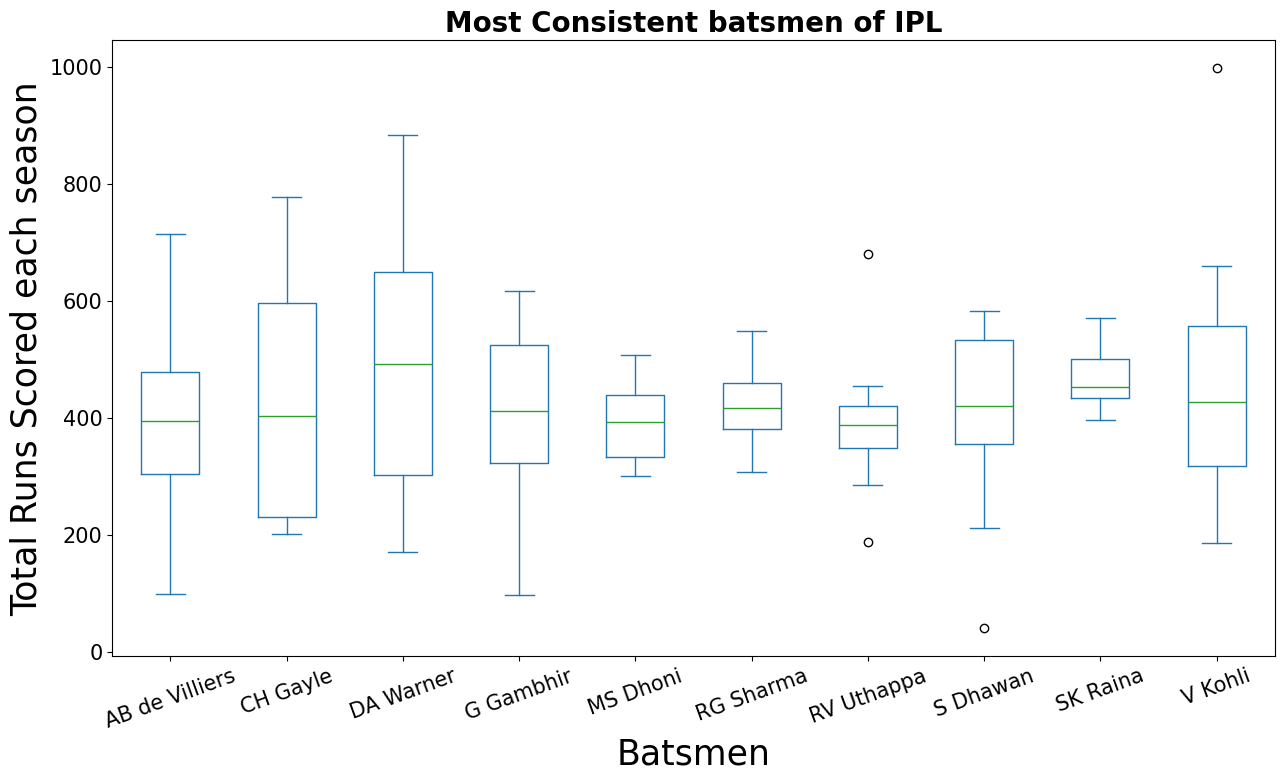

In [110]:
consistent_batsman = merge[merge.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored each season", size = 25)
plt.xticks(size = 15,rotation= 20)
plt.yticks(size = 15)

- Median score for Raina is above all the top 10 run getters. He has the highest lowest run among all the batsmen across 11 seasons. Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all.

## Bowlers Analysis

### Top bowlers based on total wickets taken.

In [93]:
wickets = deliveries_df[deliveries_df['dismissal_kind'].notnull() & (deliveries_df['dismissal_kind'] != 'run out')]
top_bowlers = wickets['bowler'].value_counts().head(10).reset_index()
top_bowlers.columns = ['bowler', 'wickets']
top_bowlers.head(10)

,bowler,wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


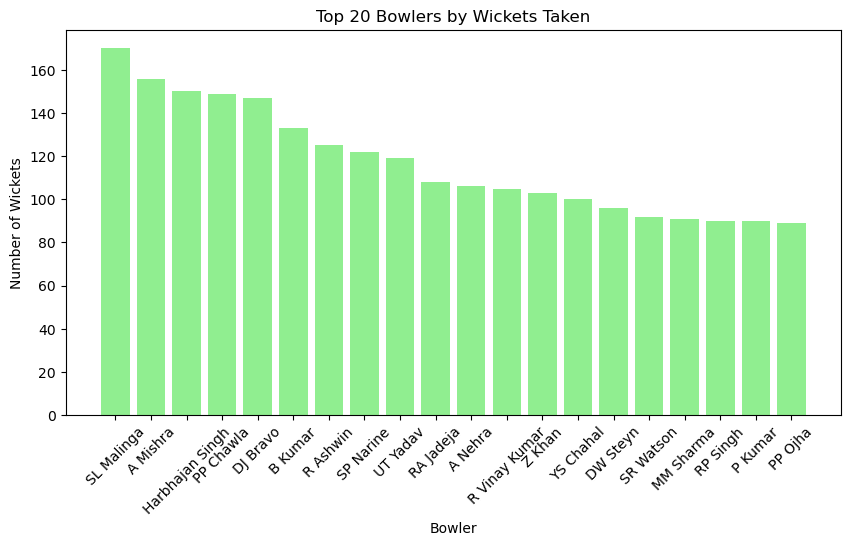

In [104]:
# Calculate the top bowlers based on the number of wickets taken
wickets = deliveries_df[deliveries_df['dismissal_kind'].notnull() & (deliveries_df['dismissal_kind'] != 'run out')]
top_bowlers = wickets['bowler'].value_counts().head(20).reset_index()
top_bowlers.columns = ['bowler', 'wickets']

# Plotting the top bowlers based on wickets taken
plt.figure(figsize=(10, 5))
plt.bar(top_bowlers['bowler'], top_bowlers['wickets'], color='lightgreen')
plt.title('Top 20 Bowlers by Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45)
plt.show()

* **SL Malinga** is the leading wicket taker followed by **Amit Mishra** and **Harbhajan Singh**.

### Wickets take by SL Malinga with seasons.

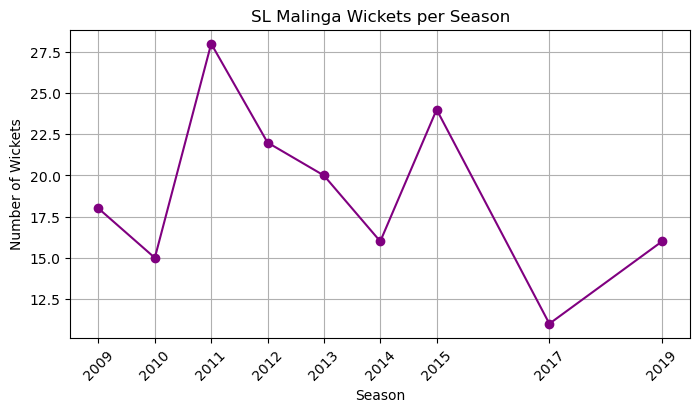

In [98]:
# Merge deliveries with matches to get the season for each delivery
merged_df = deliveries_df.merge(matches_df[['season']], left_on='match_id', right_on='id')

# Filter deliveries dataset for SL Malinga and dismissals
malinga_wickets = merged_df[(merged_df['bowler'] == 'SL Malinga') & (merged_df['dismissal_kind'].notnull()) & (merged_df['dismissal_kind'] != 'run out')]

# Group by season and count the number of wickets
malinga_wickets_per_season = malinga_wickets.groupby('season')['dismissal_kind'].count().reset_index()
malinga_wickets_per_season.columns = ['season', 'wickets']

# Plotting the number of wickets taken by SL Malinga per season
plt.figure(figsize=(8, 4))
plt.plot(malinga_wickets_per_season['season'], malinga_wickets_per_season['wickets'], marker='o', linestyle='-', color='purple')
plt.title('SL Malinga Wickets per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wickets')
plt.xticks(malinga_wickets_per_season['season'].unique(), rotation=45)
plt.grid(True)
plt.show()

* **2011** was the Peak Year for **Malinga** ,taking **28 Wickets**.

### Top bowlers based on the total number of balls bowled.

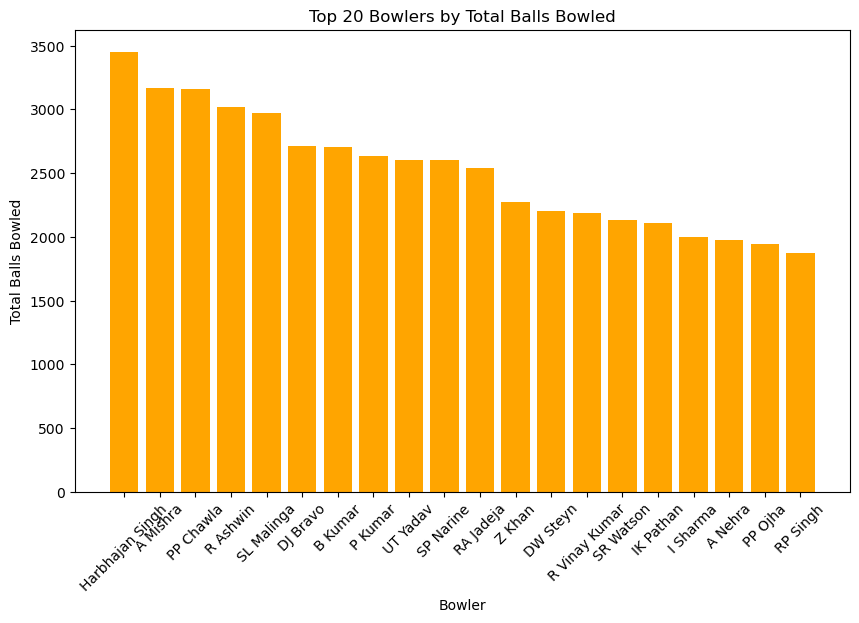

In [99]:
total_balls_bowled = deliveries_df['bowler'].value_counts().reset_index()
total_balls_bowled.columns = ['bowler', 'total_balls_bowled']

# Select the top 10 bowlers by total balls bowled
top_bowlers = total_balls_bowled.head(20)

# Plotting the top bowlers based on total balls bowled
plt.figure(figsize=(10, 6))
plt.bar(top_bowlers['bowler'], top_bowlers['total_balls_bowled'], color='orange')
plt.title('Top 20 Bowlers by Total Balls Bowled')
plt.xlabel('Bowler')
plt.ylabel('Total Balls Bowled')
plt.xticks(rotation=45)
plt.show()

* **Harbhajan Singh** Bowled most no of balls followed by **Amit Mishra** and ***Piyush Chawla***.

### Top bowlers based on the number of dot balls bowled.

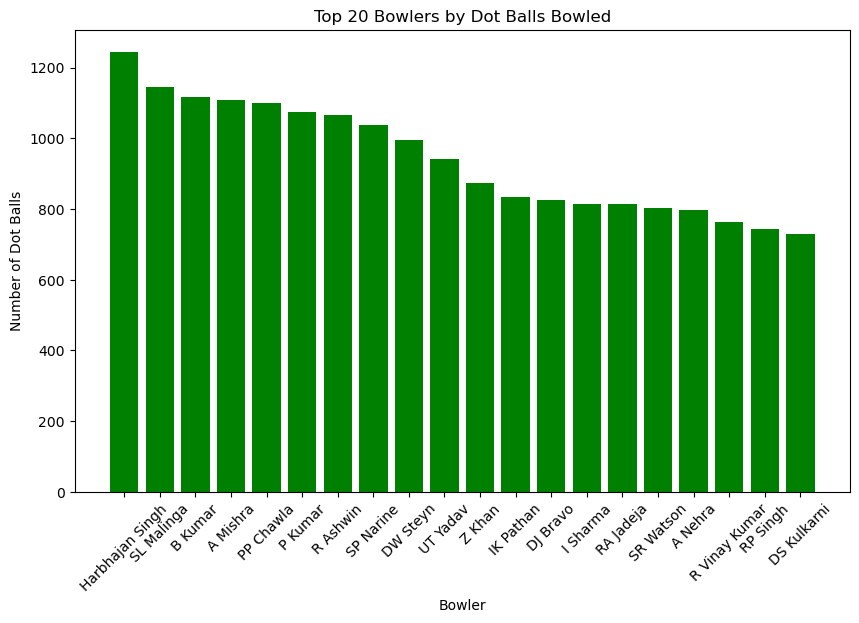

In [102]:
# Most number of dot balls bowled
dot_balls_bowled = deliveries_df[deliveries_df['total_runs'] == 0]
top_dot_balls_bowled = dot_balls_bowled['bowler'].value_counts().head(20).reset_index()
top_dot_balls_bowled.columns = ['bowler', 'dot_balls']

# Plotting the top bowlers based on dot balls bowled
plt.figure(figsize=(10, 6))
plt.bar(top_dot_balls_bowled['bowler'], top_dot_balls_bowled['dot_balls'], color='green')
plt.title('Top 20 Bowlers by Dot Balls Bowled')
plt.xlabel('Bowler')
plt.ylabel('Number of Dot Balls')
plt.xticks(rotation=45)
plt.show()

* **Harbhajan Singh** Bowled the most number of dot balls followed by **Malinga** and ***Bhuvneshwar Kumar***.

### Calculate the top bowlers based on the number of extras bowled.

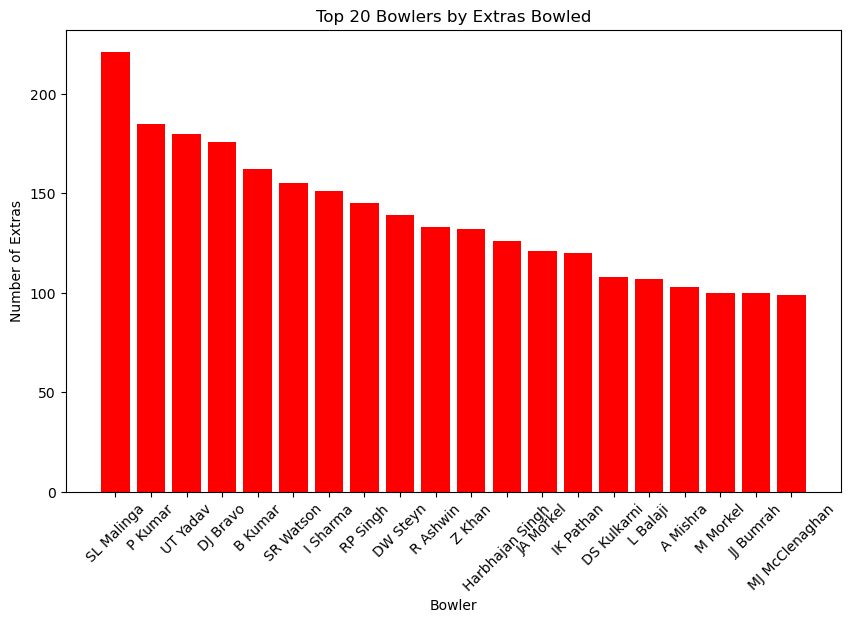

In [103]:
# Most number of extras bowled
extras_bowled = deliveries_df[deliveries_df['extra_runs'] > 0]
top_extras_bowled = extras_bowled['bowler'].value_counts().head(20).reset_index()
top_extras_bowled.columns = ['bowler', 'extras']

# Plotting the top bowlers based on extras bowled
plt.figure(figsize=(10, 6))
plt.bar(top_extras_bowled['bowler'], top_extras_bowled['extras'], color='red')
plt.title('Top 20 Bowlers by Extras Bowled')
plt.xlabel('Bowler')
plt.ylabel('Number of Extras')
plt.xticks(rotation=45)
plt.show()

* **Malinga** bowled most number of extras followed by **Praveen Kumar** and **Umesh Yadav**.

### Teams or Players a company should endorse for its products.

- If the franchise is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner...
- If the franchise is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni...
- If the franchise is looking for a batsman who could score good amount of runs every match the go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan
- If the franchise needs the best finisher in lower order having good strike rate then go for CH Gayle,KA Pollard, DA Warner,SR Watson,BB McCullum
- If the franchise need a experienced bowler then go for Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo
- If the franchise need a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla
- If the franchise need a bowler bowling most number of dot balls then go for Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla


### Conclusion
Throughout the notebook, various visualizations such as **Bar Charts**, **Line Graphs**, and **Pie Charts** were used to illustrate key insights.These visualizations help in understanding the dynamics of the IPL, player performances, and match strategies.

  The EDA provided a detailed look into the IPL, highlighting standout performances by teams and players, and revealing patterns and trends that can influence match outcomes.